In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


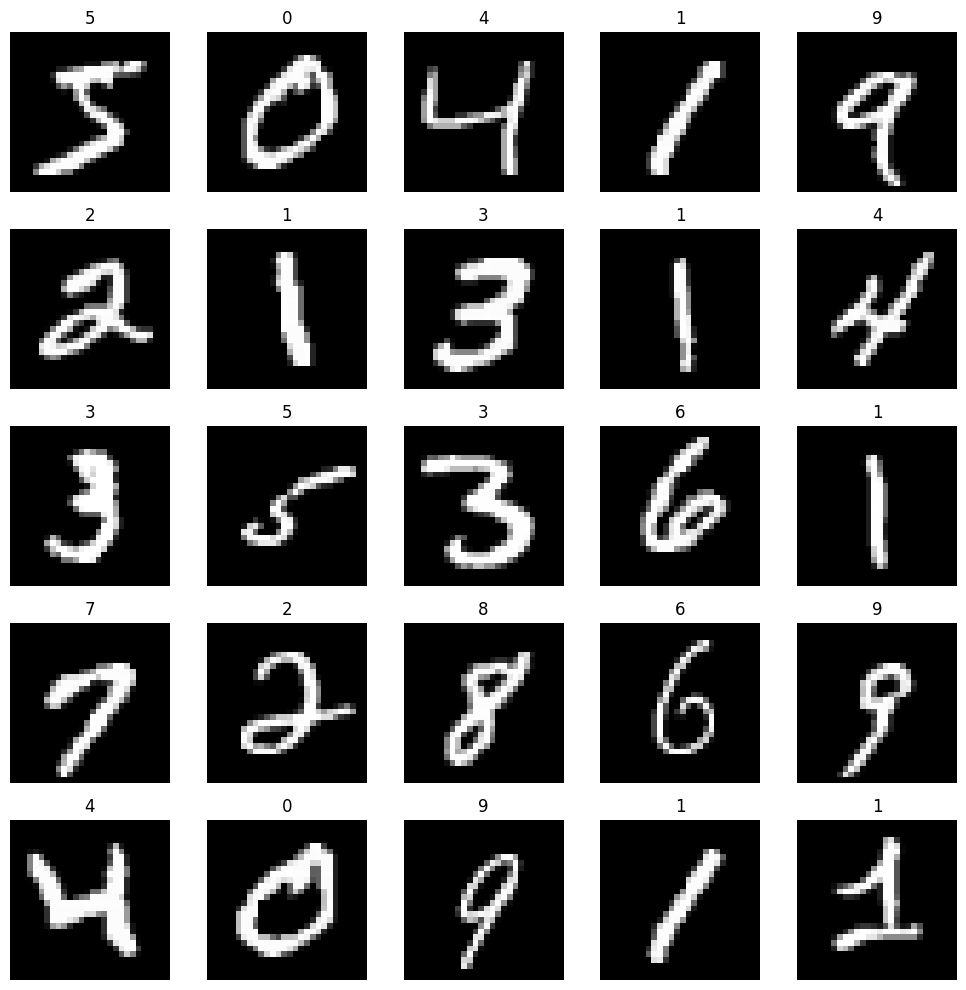

In [ ]:
fig, axes = plt.subplots(5,5, figsize = (10,10))

for i in range(25):
  ax = axes[i//5, i%5]
  ax.imshow(x_train[i], cmap='gray')
  ax.set_title(y_train[i])
  ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
x_train[0].shape

for row in range(x_train[0].shape[0]):
    for col in range(x_train[0].shape[1]):
        value = x_train[0][row, col]
        value/=255.0
        print(f'{value:.2f}',end=' ')
    print()
print(y_train[0])

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.07 0.07 0.07 0.49 0.53 0.69 0.10 0.65 1.00 0.97 0.50 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.14 0.37 0.60 0.67 0.99 0.99 0.99 0.99 0.99 0.88 0.67 0.99 0.95 0.76 0.25 0.00 0.00 0.00 0.00 
0.00 0.00 0.0

## Reshaping data (reducing its dimension from 2D to 1D)

In [ ]:
x_train = x_train.reshape(-1,28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1,28*28).astype('float32') / 255.0


In [ ]:
model = keras.Sequential(
    [
        layers.Dense(512, activation = 'relu',input_shape = (784,)),
        layers.Dense(256, activation = 'relu'),
        layers.Dense(10,activation = 'softmax'),
    ]
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(x_train,y_train, epochs = 6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9076 - loss: 0.3125
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9747 - loss: 0.0782
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9839 - loss: 0.0491
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9875 - loss: 0.0393
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9906 - loss: 0.0287
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9926 - loss: 0.0230


In [ ]:
model.evaluate(x_test,y_test, verbose =2)

313/313 - 1s - 3ms/step - accuracy: 0.9818 - loss: 0.0684


[0.06838153302669525, 0.9818000197410583]

## Self Testing

In [ ]:
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMG_20241010_053047.jpg to IMG_20241010_053047 (1).jpg
Saving IMG_20241010_053025.jpg to IMG_20241010_053025 (1).jpg
Saving IMG_20241010_053013.jpg to IMG_20241010_053013 (1).jpg
Saving IMG_20241010_053004.jpg to IMG_20241010_053004 (1).jpg


In [ ]:
import os
os.listdir()

['.config',
 'IMG_20241010_053013 (1).jpg',
 'IMG_20241010_053047.jpg',
 'IMG_20241010_053025 (1).jpg',
 'IMG_20241010_053047 (1).jpg',
 'IMG_20241010_053004.jpg',
 'IMG_20241010_053013.jpg',
 'IMG_20241010_053004 (1).jpg',
 'IMG_20241010_053025.jpg',
 'sample_data']

In [ ]:
images = []

for file in uploaded.keys():
  img = Image.open(file)
  img = img.convert('L')
  img = img.resize((28,28))
  img = np.array(img)
  images.append(img)
images = np.array(images).reshape(-1,28*28).astype('float32') / 255.0

In [ ]:
print(images.shape)

(4, 784)


In [ ]:
predictions = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
